In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm


In [2]:
data = sm.datasets.get_rdataset('AirPassengers').data
data['time'] = pd.date_range(start = '1949-01', periods=len(data), freq='ME')
data.set_index('time', inplace=True)
passengers = data['value']

In [3]:
passengers

time
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Name: value, Length: 144, dtype: int64

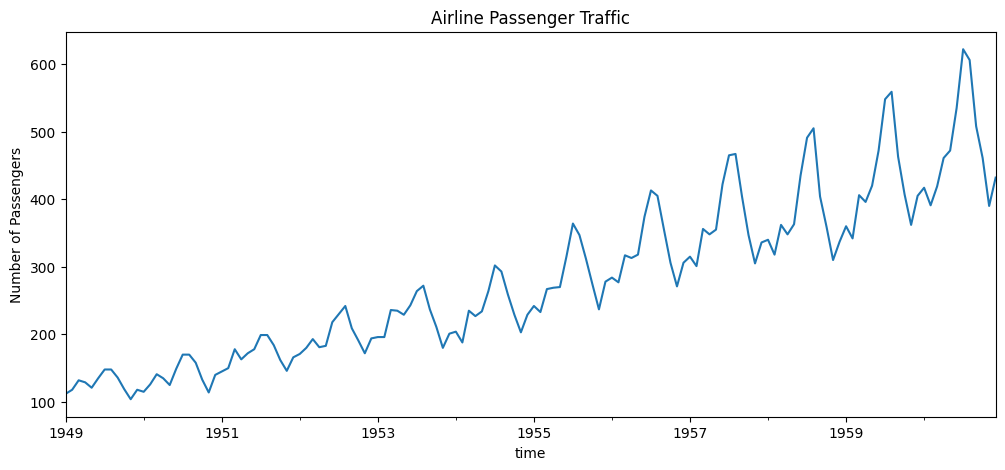

In [6]:
# EDA plot to visualize data
plt.figure(figsize=(12,5))
passengers.plot(title = 'Airline Passenger Traffic')
plt.ylabel('Number of Passengers')
plt.show()

In [10]:
# checking if data is stationary
result = adfuller(passengers)
result
print(f'ADF Statistics: {result[0]}')
print(f'P-Value: {result[1]}')

ADF Statistics: 0.8153688792060482
P-Value: 0.991880243437641


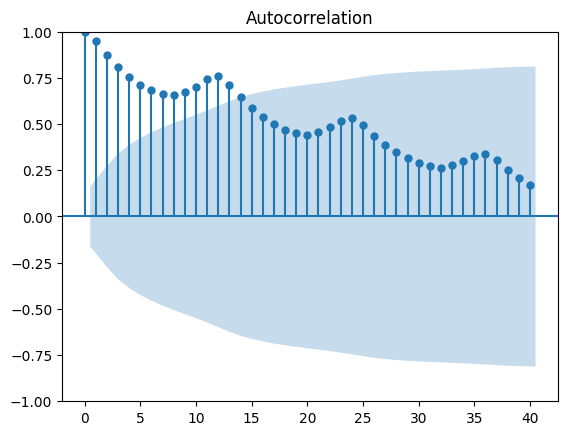

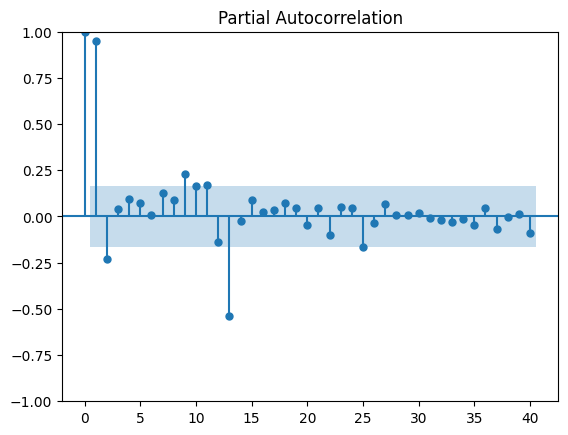

In [14]:
lags = 40
plot_acf(passengers, lags = 40)
plot_pacf(passengers,lags=40, method='ywm')
plt.show()

In [ ]:
# blue dot shows correlation on past data.
#spike shows seasonal 

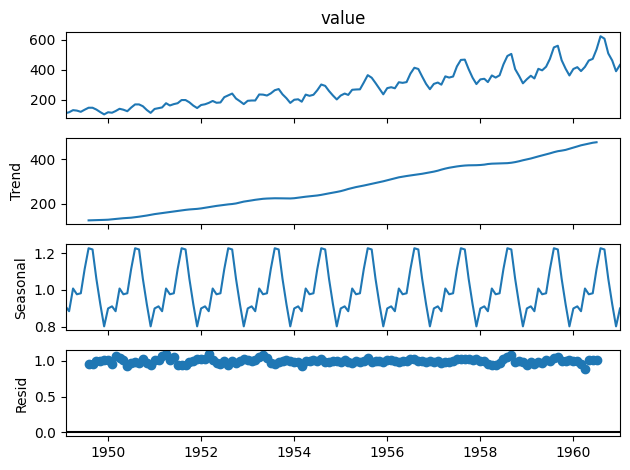

In [16]:
decompose_result = seasonal_decompose(passengers, model='multiplicative')
decompose_result.plot()
plt.show()

In [ ]:
arima_model = ARIMA(passengers, order=(1,1,1)) # order is value fo P q(value of diffentiating)
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 29 Oct 2025   AIC                           1394.683
Time:                        19:37:15   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

c:\Users\seknathraogu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\seknathraogu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\seknathraogu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [18]:
sarima_model = SARIMAX(passengers, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())


c:\Users\seknathraogu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\seknathraogu\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 29 Oct 2025   AIC                           1022.299
Time:                                    19:44:49   BIC                           1036.675
Sample:                                01-31-1949   HQIC                          1028.140
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

In [23]:
sample_pred = sarima_result.get_prediction(start = passengers.index[0],end = passengers.index[-1])
sample_pred_ci = sample_pred.conf_int()

n_steps = 24
out_of_sample_forecast = sarima_result.get_forecast(steps = n_steps)
forecast_index = pd.date_range(start = passengers.index[-1], periods= n_steps+1, freq='ME')[1:]
out_of_sample_forecast_ci = out_of_sample_forecast.conf_int()
out_of_sample_forecast.predicted_mean.index = forecast_index

In [26]:
print("Forecasted values: \n", out_of_sample_forecast.predicted_mean)

Forecasted values: 
 1961-01-31    449.330129
1961-02-28    424.386084
1961-03-31    459.031964
1961-04-30    497.864835
1961-05-31    509.862621
1961-06-30    568.258347
1961-07-31    655.810550
1961-08-31    641.190472
1961-09-30    546.392100
1961-10-31    496.800879
1961-11-30    427.673943
1961-12-31    471.235394
1962-01-31    484.960580
1962-02-28    458.867374
1962-03-31    487.372857
1962-04-30    529.139524
1962-05-31    540.212517
1962-06-30    602.877262
1962-07-31    689.917471
1962-08-31    674.017934
1962-09-30    576.251026
1962-10-31    529.062374
1962-11-30    458.198741
1962-12-31    500.312422
Freq: ME, Name: predicted_mean, dtype: float64


In [27]:
print("Confidence Intervals: \n", out_of_sample_forecast_ci)

Confidence Intervals: 
             lower value  upper value
1961-01-31   426.900724   471.759534
1961-02-28   397.538913   451.233255
1961-03-31   427.915927   490.148001
1961-04-30   463.054553   532.675117
1961-05-31   471.707717   548.017525
1961-06-30   527.030020   609.486673
1961-07-31   611.722443   699.898656
1961-08-31   594.417122   687.963823
1961-09-30   497.079509   595.704691
1961-10-31   445.073544   548.528213
1961-11-30   373.639683   481.708203
1961-12-31   414.988658   527.482130
1962-01-31   418.148736   551.772424
1962-02-28   386.006666   531.728082
1962-03-31   408.594532   566.151181
1962-04-30   444.898189   613.380860
1962-05-31   450.836683   629.588351
1962-06-30   508.646867   697.107658
1962-07-31   591.070573   788.764369
1962-08-31   570.760735   777.275133
1962-09-30   468.764332   683.737720
1962-10-31   417.506427   640.618322
1962-11-30   342.716840   573.680643
1962-12-31   381.033713   619.591131


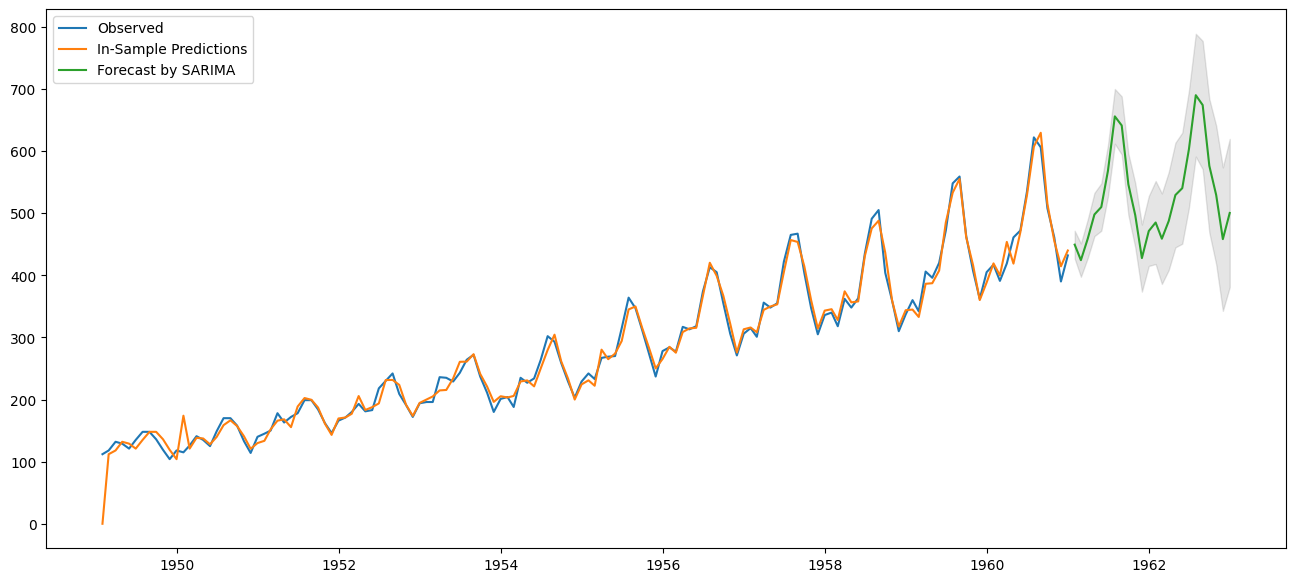

In [34]:
plt.figure(figsize=(16,7))
plt.plot(passengers, label='Observed')
plt.plot(sample_pred.predicted_mean, label = "In-Sample Predictions")

plt.plot(out_of_sample_forecast.predicted_mean, label='Forecast by SARIMA')
plt.fill_between(forecast_index, out_of_sample_forecast_ci.iloc[:,0], out_of_sample_forecast_ci.iloc[:,1], color='k', alpha = 0.1)
plt.legend()
plt.show()

In [35]:
sample_pred1 = arima_result.get_prediction(start = passengers.index[0],end = passengers.index[-1])
sample_pred_ci1 = sample_pred1.conf_int()

n_steps = 24
out_of_sample_forecast1 = arima_result.get_forecast(steps = n_steps)
forecast_index1 = pd.date_range(start = passengers.index[-1], periods= n_steps+1, freq='ME')[1:]
out_of_sample_forecast_ci1 = out_of_sample_forecast1.conf_int()
out_of_sample_forecast1.predicted_mean.index = forecast_index1

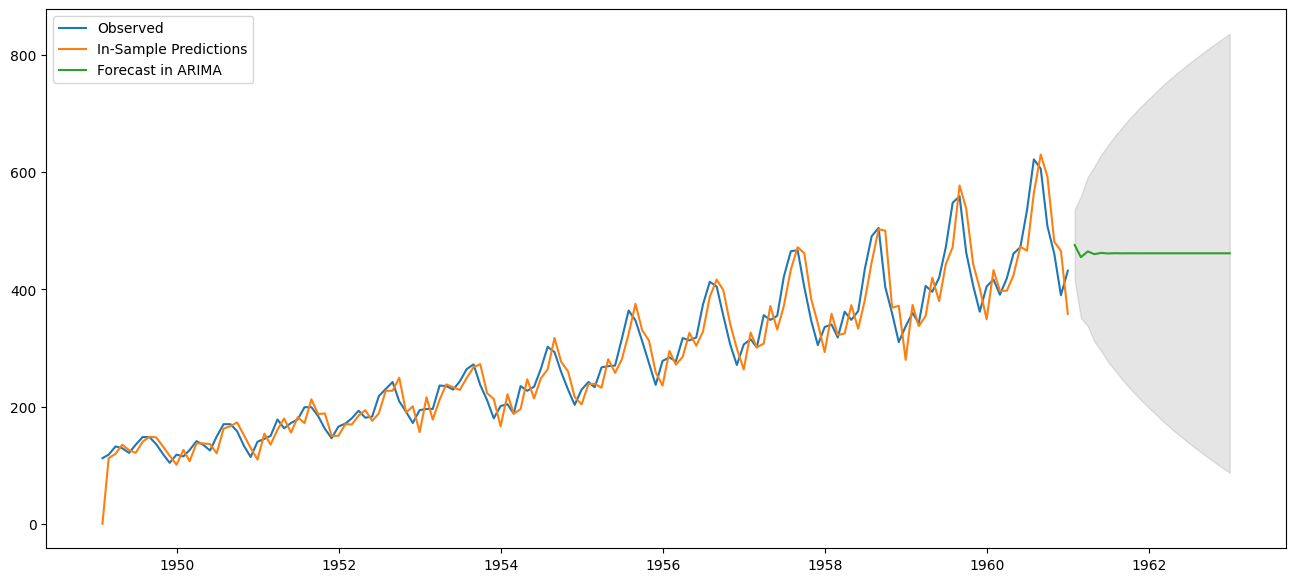

In [ ]:
#plotting observations in ARIMA
plt.figure(figsize=(16,7))
plt.plot(passengers, label='Observed')
plt.plot(sample_pred1.predicted_mean, label = "In-Sample Predictions")

plt.plot(out_of_sample_forecast1.predicted_mean, label='Forecast in ARIMA')
plt.fill_between(forecast_index1, out_of_sample_forecast_ci1.iloc[:,0], out_of_sample_forecast_ci1.iloc[:,1], color='k', alpha = 0.1)
plt.legend()
plt.show()